In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('/Users/hikari/Downloads/USDJPY.csv',encoding="shift-jis")
df

,日付,始値,高値,安値,終値
0,2007/04/02,117.84,118.08,117.46,117.84
1,2007/04/03,117.84,118.98,117.72,118.96
2,2007/04/04,118.92,119.08,118.56,118.72
3,2007/04/05,118.72,118.99,118.44,118.72
4,2007/04/06,118.72,119.39,118.67,119.27
5,2007/04/09,119.28,119.39,119.19,119.33
6,2007/04/10,119.34,119.37,118.77,119.06
7,2007/04/11,119.06,119.55,118.88,119.38
8,2007/04/12,119.38,119.52,118.81,119.16
9,2007/04/13,119.16,119.57,118.22,119.22


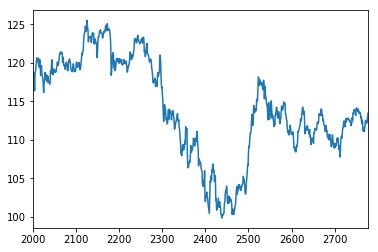

In [66]:
df['終値'][2000:].plot()
plt.show()

In [67]:
from fbprophet import Prophet

In [72]:
df = df.rename(columns={'日付': 'ds','高値':'y'})

In [82]:
df = df.drop("終値", axis=1)

In [83]:
df = df.drop("安値",axis=1)

In [84]:
df = df.drop("始値",axis=1)

In [85]:
model = Prophet()

In [86]:
model.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
3139,2018-12-04,104.878722,93.368081,115.640463,94.516369,118.542641,1.648473,1.648473,1.648473,1.648473,1.648473,1.648473,1.041114,1.041114,1.041114,0.607358,0.607358,0.607358,106.527194
3140,2018-12-05,104.870044,93.316506,115.648227,94.611006,117.980891,1.707326,1.707326,1.707326,1.707326,1.707326,1.707326,1.062118,1.062118,1.062118,0.645208,0.645208,0.645208,106.577370
3141,2018-12-06,104.861366,93.271106,115.655991,95.069095,117.791114,1.773684,1.773684,1.773684,1.773684,1.773684,1.773684,1.088835,1.088835,1.088835,0.684848,0.684848,0.684848,106.635049
3142,2018-12-07,104.852688,93.225706,115.663754,94.785587,119.469086,1.850630,1.850630,1.850630,1.850630,1.850630,1.850630,1.124479,1.124479,1.124479,0.726151,0.726151,0.726151,106.703318
3143,2018-12-08,104.844010,93.170174,115.671518,90.485415,115.016202,-1.894083,-1.894083,-1.894083,-1.894083,-1.894083,-1.894083,-2.663007,-2.663007,-2.663007,0.768924,0.768924,0.768924,102.949927


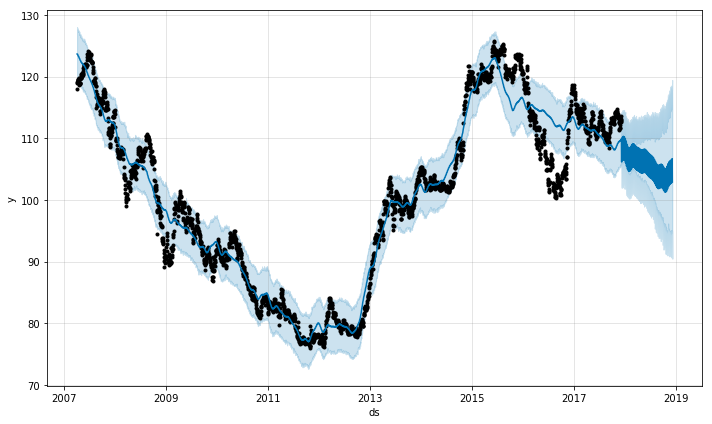

In [100]:

model.plot(forecast)

In [109]:
forecast[2780:]

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
2780,2017-12-10,107.994101,107.994101,107.994101,101.984728,110.394111,-1.793854,-1.793854,-1.793854,-1.793854,-1.793854,-1.793854,-2.663007,-2.663007,-2.663007,0.869152,0.869152,0.869152,106.200247
2781,2017-12-11,107.985423,107.985423,107.985423,105.806879,114.066927,1.924161,1.924161,1.924161,1.924161,1.924161,1.924161,1.009466,1.009466,1.009466,0.914695,0.914695,0.914695,109.909584
2782,2017-12-12,107.976745,107.976745,107.976745,105.830109,114.296335,2.001403,2.001403,2.001403,2.001403,2.001403,2.001403,1.041114,1.041114,1.041114,0.960288,0.960288,0.960288,109.978148
2783,2017-12-13,107.968067,107.968067,107.968067,105.856371,114.128849,2.067606,2.067606,2.067606,2.067606,2.067606,2.067606,1.062118,1.062118,1.062118,1.005488,1.005488,1.005488,110.035674
2784,2017-12-14,107.959389,107.959389,107.959389,106.026025,114.054075,2.138657,2.138657,2.138657,2.138657,2.138657,2.138657,1.088835,1.088835,1.088835,1.049822,1.049822,1.049822,110.098047
2785,2017-12-15,107.950711,107.950711,107.950711,106.183275,114.560795,2.217280,2.217280,2.217280,2.217280,2.217280,2.217280,1.124479,1.124479,1.124479,1.092801,1.092801,1.092801,110.167991
2786,2017-12-16,107.942034,107.942034,107.942034,102.034764,110.327594,-1.529083,-1.529083,-1.529083,-1.529083,-1.529083,-1.529083,-2.663007,-2.663007,-2.663007,1.133924,1.133924,1.133924,106.412951
2787,2017-12-17,107.933356,107.933356,107.933356,102.265978,110.534710,-1.490316,-1.490316,-1.490316,-1.490316,-1.490316,-1.490316,-2.663007,-2.663007,-2.663007,1.172691,1.172691,1.172691,106.443039
2788,2017-12-18,107.924678,107.924678,107.924678,106.245599,114.483400,2.218075,2.218075,2.218075,2.218075,2.218075,2.218075,1.009466,1.009466,1.009466,1.208609,1.208609,1.208609,110.142753
2789,2017-12-19,107.916000,107.916000,107.916000,105.711535,114.259329,2.282317,2.282317,2.282317,2.282317,2.282317,2.282317,1.041114,1.041114,1.041114,1.241203,1.241203,1.241203,110.198317
